In [1]:
import traces
from datetime import datetime

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [59]:
ts = traces.TimeSeries(data=[
    (datetime(2016, 9, 27, 23, 0, 0), 30),
    (datetime(2016, 9, 27, 23, 0, 5), 33),
    (datetime(2016, 9, 27, 23, 0, 10), 33),
    (datetime(2016, 9, 27, 23, 0, 15), 34),
    (datetime(2016, 9, 27, 23, 0, 31), 25),
    (datetime(2016, 9, 27, 23, 0, 45), 30),
    (datetime(2016, 9, 27, 23, 0, 45), 38),
    (datetime(2016, 9, 27, 23, 1, 45), 33),
    (datetime(2016, 9, 27, 23, 1, 55), 24),
    (datetime(2016, 9, 27, 23, 2, 15), 24),
])

In [64]:
inrange = traces.TimeSeries(default=False)
for t, v in ts:
    inrange[t] = (31 < v < 35)
    
inrange.compact()

intervals_in_range = []
for t0, t1, value in inrange.iterperiods(value=True):
    if (t1 - t0).total_seconds() > 20:
        intervals_in_range.append((t0, t1))
        
intervals_in_range

[(datetime.datetime(2016, 9, 27, 23, 0, 5),
  datetime.datetime(2016, 9, 27, 23, 0, 31))]

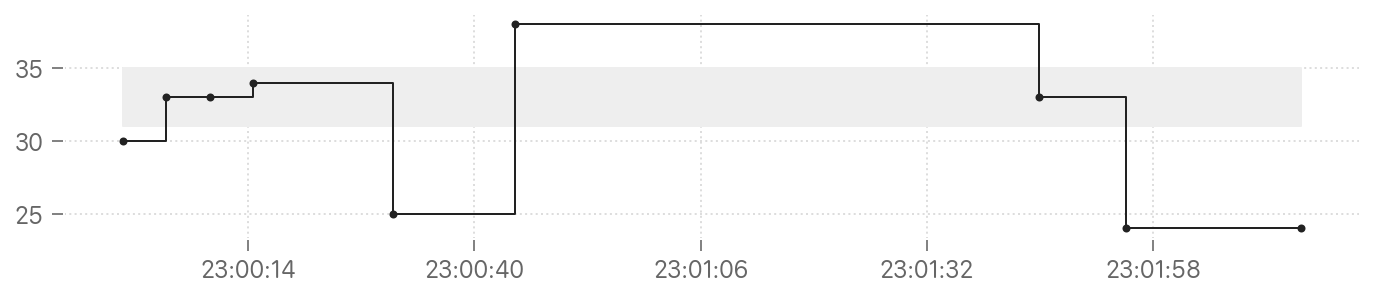

In [61]:
import matplotlib.dates as mdates
fig, ax = ts.plot()
ax.fill_between([ts.first_key(), ts.last_key()], 31, 35, color="#eee")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))